### Import packages

In [1]:
import os
import glob
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Global variables

In [2]:
RAW_DATA_PATH = "../../Data/Gamma_Radiation_Set/Raw/"
CLEAN_DATA_FILE = "../../Data/Gamma_Radiation_Set/Clean/Gamma_Radiation_Data.csv"

RAW_DATA_ENCODING = "-1250"
RAD_DATA_SEP = ";"

### Get data

In [3]:
df_full = pd.DataFrame(columns=["Stacje", "Miejscowość (lokalizacja)", "Zakres średniej dziennej mocy dawki [nSv/h]", "Średnia [nSv/h]", "Daty"])

raw_data_path = '../../Data/Gamma_Radiation_Set/Raw/'
csv_files = glob.glob(os.path.join(RAW_DATA_PATH, "*.csv"))

for data in csv_files:
  print("Reading file:", data)
  df_csv = pd.read_csv(data, encoding=RAW_DATA_ENCODING, sep=RAD_DATA_SEP)
  
  dates_from_filename = re.findall("\d{1,2}.\d{2}.\d{2}-\d{2}.\d{2}.\d{2}", data)
  print(dates_from_filename)
  df_csv["Daty"] = ''.join(dates_from_filename)

  df_full = pd.concat([df_full, df_csv], ignore_index=True)

print("\nSample data:\n", df_full.sample(5))
print("\nValue counts:\n", df_full.value_counts())

Reading file: ../../Data/Gamma_Radiation_Set/Raw\Rozkład_mocy_dawki_promieniowania_gamma_06.09.22-20.09.22_4e4R7q7.csv
['06.09.22-20.09.22']
Reading file: ../../Data/Gamma_Radiation_Set/Raw\Rozkład_mocy_dawki_promieniowania_gamma_09.08.22-23.08.22.csv
['09.08.22-23.08.22']
Reading file: ../../Data/Gamma_Radiation_Set/Raw\Rozkład_mocy_dawki_promieniowania_gamma_1.06.22-14.06.22_Ut7Ba7g.csv
['1.06.22-14.06.22']
Reading file: ../../Data/Gamma_Radiation_Set/Raw\Rozkład_mocy_dawki_promieniowania_gamma_12.07.22-26.07.22.csv
['12.07.22-26.07.22']
Reading file: ../../Data/Gamma_Radiation_Set/Raw\Rozkład_mocy_dawki_promieniowania_gamma_14.06.22-28.06.22_DH9trpj.csv
['14.06.22-28.06.22']
Reading file: ../../Data/Gamma_Radiation_Set/Raw\Rozkład_mocy_dawki_promieniowania_gamma_23.08.22-06.09.22.csv
['23.08.22-06.09.22']
Reading file: ../../Data/Gamma_Radiation_Set/Raw\Rozkład_mocy_dawki_promieniowania_gamma_26.07.22-09.08.22.csv
['26.07.22-09.08.22']
Reading file: ../../Data/Gamma_Radiation_Set/Ra

In [4]:
df_full.to_csv(CLEAN_DATA_FILE, index=False)

### Get clean data

In [5]:
df_clean = pd.read_csv(CLEAN_DATA_FILE)

### Clean data EDA

In [6]:
print("Clean data has", df_clean.shape[0], "rows and", df_clean.shape[1], "columns")
for col in df_clean.columns:
    print("Column", col, "has", df_clean[col].isna().sum(), "missing values")

Clean data has 357 rows and 5 columns
Column Stacje has 0 missing values
Column Miejscowość (lokalizacja) has 0 missing values
Column Zakres średniej dziennej mocy dawki [nSv/h] has 0 missing values
Column Średnia [nSv/h] has 0 missing values
Column Daty has 0 missing values


In [7]:
# Get unique Stations values 
df_stations = df_clean["Stacje"].unique()
print("Unique Stations values:", df_stations)

# How much localizations are there?
df_localization_values = df_clean["Miejscowość (lokalizacja)"].value_counts()
print("Number of localizations:\n", df_localization_values.head(5))

# Where and when average values are the highest?
df_grouping = df_clean.groupby(['Miejscowość (lokalizacja)', "Daty"]).max()
print("Highest averages:\n", df_grouping)

# What are the average values for Warsaw and Lublin?
df_averages_warsaw = df_clean.loc[df_clean['Miejscowość (lokalizacja)'] == "Warszawa"]
df_averages_lublin = df_clean.loc[df_clean['Miejscowość (lokalizacja)'] == "Lublin"]
print("Warsaw has", df_averages_warsaw, "and Lublin has", df_averages_lublin)

# Which city has the most measures?
df_most_measures = df_clean.groupby("Miejscowość (lokalizacja)").count().head(1)
print("City with most measures is", df_most_measures)

Unique Stations values: ['PMS' 'IMiGW']
Number of localizations:
 Włodawa     16
Gdynia      16
Legnica     16
Warszawa    15
Babiki       8
Name: Miejscowość (lokalizacja), dtype: int64
Highest averages:
                                             Stacje  \
Miejscowość (lokalizacja) Daty                       
Babiki                    06.09.22-20.09.22    PMS   
                          09.08.22-23.08.22    PMS   
                          1.06.22-14.06.22     PMS   
                          12.07.22-26.07.22    PMS   
                          14.06.22-28.06.22    PMS   
...                                            ...   
Świnoujście               12.07.22-26.07.22  IMiGW   
                          14.06.22-28.06.22  IMiGW   
                          23.08.22-06.09.22  IMiGW   
                          26.07.22-09.08.22  IMiGW   
                          28.06.22-12.07.22  IMiGW   

                                            Zakres średniej dziennej mocy dawki [nSv/h]  \


### Plots

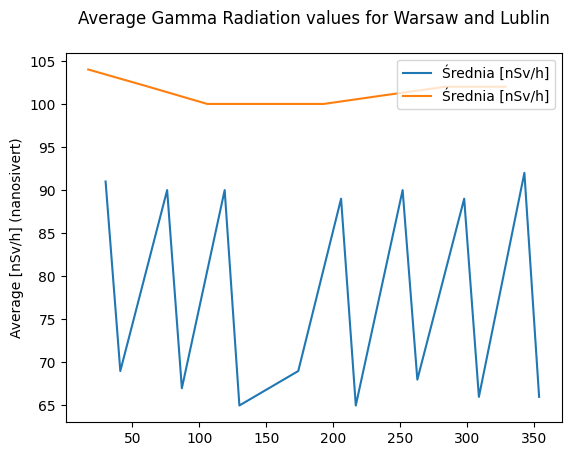

In [10]:
df_averages_warsaw_analysis = df_averages_warsaw[['Średnia [nSv/h]', 'Daty']]
df_averages_warsaw_analysis = df_averages_lublin[['Średnia [nSv/h]', 'Daty']]

ax = df_averages_warsaw.plot(
    label="Warsaw"
)
df_averages_lublin.plot(
    ax=ax,
    label="Lublin", 
    ylabel='Average [nSv/h] (nanosivert)')

ax.set_title('Average Gamma Radiation values for Warsaw and Lublin\n')
ax.legend(title='City')
plt.legend(loc="upper right")

plt.show()